<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Credit One Model Development
<br><br></p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Problem
</p>

1. Credit One is a credit rating service that is facing an increase in customer default rates.

2. Revenue & customer loss and, eventually, loss of clients for Credit One.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Business Questions
</p>

1. How to ensure that customers can and will pay their loans?
2. Can this be done?

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Notes on the credit dataset
</p>

###### Attributes
* LIMIT_BAL: Amount of credit
* SEX: 1=male; 2=female
* EDUCATION: 1=graduate school; 2=university; 3=high school; 4,5,6,0=other
* MARRIAGE: 1=married; 2=single, 3=divorce, 0=other
* AGE: years
* PAY_0 --> PAY_6: History of past payments from Sep, Aug, Jul, Jun, May, Apr 2005
    * -2=no consumption;
    * -1=paid in full
    * 0=use of revolving credit
    * 1=payment delay for 1 month
    * 2=payment delay for 2 months
    * 9=payment delay for 9 months
* BILL_AMT1 --> BILL_AMT6: Amount of bill statement from Sep, Aug, Jul, Jun, May, Apr 2005
* PAY_AMT1 --> PAY_AMT6: Amount of previous statement from Sep, Aug, Jul, Jun, May, Apr 2005
* default payment next month: Client's behavior
    * 0=not default
    * 1=default

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Import Libraries
</p>

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estimators
from sklearn.feature_selection import VarianceThreshold, RFE, f_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.decomposition import PCA

In [88]:
# Models

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
# from sklearn.linear_model import LogisticRegression, LinearRegression

# Decion Tree
# from sklearn.tree import DecisionTreeClassifier

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Linear Discriminant Analysis
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Gaussian Naive Bayes
# from sklearn.naive_bayes import GaussianNB

# Support Vector Machine
from sklearn.svm import SVC, LinearSVC

In [107]:
# Model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score

In [5]:
# Cross validation
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [6]:
# Autocomplete methods
%config IPCompleter.greedy=True

<br><p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Import & Explore Data
</p>

In [7]:
credit = pd.read_csv('../Task2/CreditOneEDA/default of credit card clients.csv', header = 1)
credit.shape

(30000, 25)

In [8]:
# View data
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Understand the makeup of the data (summary)

credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### What are the negative bill amounts (shown under minimum)?

In [10]:
# Check for missing values

credit.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [11]:
# Check the data types of each variable

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [12]:
# Get rows and columns for the dataset

print('Indicies are:', credit.index)
print()
print('Columns are:', credit.columns)

Indicies are: RangeIndex(start=0, stop=30000, step=1)

Columns are: Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


<br><p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Preprocess
</p>

* Remove ID column
* Replace white space in columns name with '_'
* Recode values in education (0,4,5,6 as 0 -> other)
* Convert 'default_payment_next_month' to categorical variable
* Recode 'default_payment_next_month'; 0=Not Default, 1=Default
* Descritize age?

In [15]:
# Copy the dataframe to start preprocessing
credit_ready = credit.copy(deep=True)

In [16]:
# Delete ID column

del credit_ready['ID']

In [17]:
# Replace white space in columns name with '_'

credit_ready.columns = credit_ready.columns.str.replace(' ', '_')

In [18]:
# Recode values in education column

credit_ready['EDUCATION'] = credit_ready['EDUCATION'].replace([0, 4, 5, 6], 0)

In [19]:
credit_ready['EDUCATION'].describe()

count    30000.000000
mean         1.779867
std          0.728486
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: EDUCATION, dtype: float64

In [20]:
# Convert last column to categorical

credit_ready['default_payment_next_month'] = pd.Categorical(credit_ready['default_payment_next_month'])
credit_ready.default_payment_next_month.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [21]:
# Recode categorical variables

credit_ready['default_payment_next_month'] = credit_ready['default_payment_next_month'].replace(0,'Not Default')
credit_ready['default_payment_next_month'] = credit_ready['default_payment_next_month'].replace(1,'Default')

In [22]:
credit_ready.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Default
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Default
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Not Default
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Not Default
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Not Default


<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Feature Selection: Remove Highly Correlated Variables
</p>

In [23]:
# Identify correlation matrix
credit_ready_CorMat = credit_ready.corr().abs()

# Select upper triangle of correlation matrix
upper = credit_ready_CorMat.where(np.triu(np.ones(credit_ready_CorMat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9.
to_drop = [column for column in upper.columns if any(upper[column]>0.9)]

In [24]:
to_drop

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [26]:
# Drop highly correlated featrues.
credit_cor = credit_ready.drop(credit_ready[to_drop],axis=1)

In [27]:
credit_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                

In [28]:
# Ssave the dataset from corrleation matrix
credit_cor.to_csv('credit_cor.csv')

In [29]:
credit_cor = pd.read_csv('credit_cor.csv', header = 1)

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Feature Selection: Zear Zero Variance
</p>

In [30]:
credit_ready.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Default
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Default
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Not Default
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Not Default
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Not Default


In [31]:
# Create features and target
X = credit_ready.iloc[:, 0:23]
y = credit_ready.iloc[:, -1]

In [32]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [33]:
y.head()

0        Default
1        Default
2    Not Default
3    Not Default
4    Not Default
Name: default_payment_next_month, dtype: object

In [37]:
# Create VarianceThreshold object with a variance threshold of 0.5
thresholder = VarianceThreshold(threshold=0.5)

In [38]:
# Apply the threshold filter to the data set X
thresholder.fit(X)

VarianceThreshold(threshold=0.5)

In [39]:
# Get all the features that are not constant
var_col = len(X.columns[thresholder.get_support()])

In [40]:
# # list of all the column that are above the threshold
var_col

21

In [41]:
# Get the number Y names of of constant features
var_col_name = [column for column in X.columns
                if column in X.columns[thresholder.get_support()]]

for column in var_col_name:
    print(column)

LIMIT_BAL
EDUCATION
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


In [42]:
# Get the number of constant features
const_col = [column for column in X.columns
            if column not in X.columns[thresholder.get_support()]]
print(len(const_col))

2


In [43]:
# Constant columns
for column in const_col:
    print(column)

SEX
MARRIAGE


Two of the columns have near zero variance.

Below code shows how to remove the columns that have near zero variance.

In [44]:
X_nzv = thresholder.transform(X)
print(X_nzv.shape)
print(type(X_nzv))

(30000, 21)
<class 'numpy.ndarray'>


In [45]:
X_nzvDF = pd.DataFrame(data=X_nzv, columns =['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
print(type(X_nzvDF))
X_nzvDF.head()

<class 'pandas.core.frame.DataFrame'>


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [46]:
print(y.shape)
print(type(y))

(30000,)
<class 'pandas.core.series.Series'>


In [47]:
# Combine features and target
credit_nzv = pd.concat([X_nzvDF, credit_ready[['default_payment_next_month']]], axis=1)
credit_nzv.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,Default
1,120000,2,26,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,Default
2,90000,2,34,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Not Default
3,50000,2,37,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Not Default
4,50000,2,57,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,Not Default


In [49]:
# save credit_nzv DF
credit_nzv.to_csv('credit_nzv.csv')

In [50]:
credit_nzv = pd.read_csv('credit_nzv.csv', header = 1)

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Feature Selection: Recursive Feature Elimination
</p>

In [68]:
# create a base classifier used to evaluate a subset of attributes
svm = LinearSVC()

In [69]:
# create the RFE model
# feature (X) and target (y)
rfe = RFE(svm)
rfe = rfe.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [77]:
# summarize the selection of the attributes
print('Number of features: {}'.format(rfe.n_features_))
print()
print('Selected features: {}'.format(rfe.support_))
print()
print('Feature ranking: {}'.format(rfe.ranking_))

Number of features: 11

Selected features: [False  True  True  True  True  True  True  True  True  True  True False
 False False False False False  True False False False False False]

Feature ranking: [ 8  1  1  1  1  1  1  1  1  1  1  9 10  7 13  4  5  1 11  3  2  6 12]


In [188]:
rfe

RFE(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
  n_features_to_select=None, step=1, verbose=0)

In [78]:
rfe_feature = rfe.get_support(1)

In [79]:
rfe_feature_name = X[X.columns[rfe_feature]]

In [83]:
rfe_feature_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
PAY_AMT1     30000 non-null int64
dtypes: int64(11)
memory usage: 2.5 MB


In [84]:
credit_rfe = pd.concat([rfe_feature_name, credit_ready[['default_payment_next_month']]], axis=1)

In [85]:
credit_rfe.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,default_payment_next_month
0,2,2,1,24,2,2,-1,-1,-2,-2,0,Default
1,2,2,2,26,-1,2,0,0,0,2,0,Default
2,2,2,2,34,0,0,0,0,0,0,1518,Not Default
3,2,2,1,37,0,0,0,0,0,0,2000,Not Default
4,1,2,1,57,-1,0,-1,0,0,0,2000,Not Default


In [86]:
# Save credit_rfe
credit_rfe.to_csv('credit_rfe.csv')

In [87]:
credit_rfe = pd.read_csv('credit_rfe.csv', header = 1)

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Feature Selection: Principal Component Analysis
</p>

In [51]:
# Convert features and target to values
X_pca = X.values
y_pca = y.values

In [52]:
# Standardizing the features
X_pca = StandardScaler().fit_transform(X_pca)
print(type(X_pca))
X_pca

<class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.13672015,  0.81016074,  0.30218412, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.30218412, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.30218412, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.30218412, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.67491635, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.30218412, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [53]:
# Set to 95% variance
pca = PCA(0.95)

In [54]:
# fit pca to features (X_pca)
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.n_components_

15

In [56]:
# Cumulative Variance explains
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)

[28.45 46.36 53.1  59.53 63.97 68.09 72.01 75.87 79.65 83.05 86.24 89.21
 91.69 93.96 95.72]


Text(0, 0.5, '% Variance')

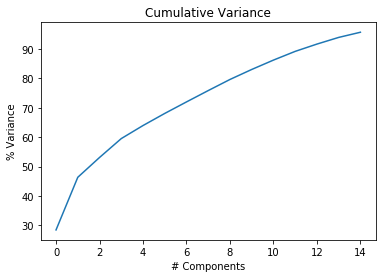

In [57]:
plt.plot(var)
plt.title('Cumulative Variance')
plt.xlabel('# Components')
plt.ylabel('% Variance')

In [58]:
credit_pc = pca.fit_transform(X_pca)

In [59]:
credit_pca = pd.DataFrame(data = credit_pc)
print(type(credit_pca))
credit_pca.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.886302,-0.925156,-0.472349,-0.545838,0.999843,0.082852,0.708650,-0.120336,-0.344663,0.053841,0.323350,3.232738,-1.019843,-0.387810,-0.204808
1,-0.762237,-2.118738,1.114745,-0.400537,0.886623,-0.126988,-0.027210,0.139109,-0.138672,0.107135,0.124329,-0.902915,0.087612,-0.317194,0.435376
2,-0.845501,-1.087349,0.419005,-0.384256,0.776812,0.085506,0.171974,-0.137968,-0.224888,0.121714,0.051224,-0.304128,0.522445,0.297508,0.011081
3,-0.194916,-0.829880,-0.859053,0.261620,0.973252,-0.100894,-0.177610,-0.035741,0.100411,-0.046419,0.029717,0.024999,-0.713096,0.462173,0.051196
4,-0.839576,-0.102061,-1.182452,2.282256,-1.026209,0.903153,-0.447212,0.144855,0.628758,-0.319362,1.031801,-0.632612,0.054729,1.300782,0.207434


In [193]:
creditData_pca = pd.concat([credit_pca, credit_ready[['default_payment_next_month']]], axis=1)

In [194]:
creditData_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,default_payment_next_month
0,-1.886302,-0.925156,-0.472349,-0.545838,0.999843,0.082852,0.708650,-0.120336,-0.344663,0.053841,0.323350,3.232738,-1.019843,-0.387810,-0.204808,Default
1,-0.762237,-2.118738,1.114745,-0.400537,0.886623,-0.126988,-0.027210,0.139109,-0.138672,0.107135,0.124329,-0.902915,0.087612,-0.317194,0.435376,Default
2,-0.845501,-1.087349,0.419005,-0.384256,0.776812,0.085506,0.171974,-0.137968,-0.224888,0.121714,0.051224,-0.304128,0.522445,0.297508,0.011081,Not Default
3,-0.194916,-0.829880,-0.859053,0.261620,0.973252,-0.100894,-0.177610,-0.035741,0.100411,-0.046419,0.029717,0.024999,-0.713096,0.462173,0.051196,Not Default
4,-0.839576,-0.102061,-1.182452,2.282256,-1.026209,0.903153,-0.447212,0.144855,0.628758,-0.319362,1.031801,-0.632612,0.054729,1.300782,0.207434,Not Default


In [196]:
# Save creditData_pca
creditData_pca.to_csv('creditData_pca.csv')

In [197]:
creditData_pca = pd.read_csv('creditData_pca.csv', header = 0)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Testing Algorithms
</p><br>

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Objective
</p>

* Extremely important to detect True Positive (Default cases).
* Acceptable to have 'Not Default' clients subject for further review prior to approval.
* False Positive are more acceptable than False Negative.
* Target highest sensitivity (recall) with good accuracy.

<p style="font-family: Arial; font-size:2em;color:purple; font-style:bold"><br>
Complete Data - credit_ready
</p>

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Random Forest - Default Parameters
</p>

In [89]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

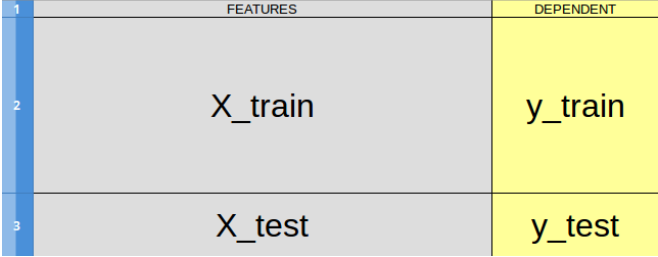

In [90]:
print('X data type is:', type(X))
print('X_train data type is:', type(X_train))
print('X_test data type is:', type(X_test))
print('y_train data type is:', type(y_train))
print('y_test data type is:', type(y_test))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X data type is: <class 'pandas.core.frame.DataFrame'>
X_train data type is: <class 'pandas.core.frame.DataFrame'>
X_test data type is: <class 'pandas.core.frame.DataFrame'>
y_train data type is: <class 'pandas.core.series.Series'>
y_test data type is: <class 'pandas.core.series.Series'>


((22500, 23), (7500, 23), (22500,), (7500,))

In [91]:
#RF model variable fore credit ready data set
RF_credit =  RandomForestClassifier()

# Pass training data to the model and learn relationship between X_train (feature) and y_train (label)
RF_credit.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
# Predict the test set
RF_credit_pred = RF_credit.predict(X_test)

In [128]:
# Performance evaluation
RF_credit_cm = confusion_matrix(y_test, RF_credit_pred)

<p style="color:purple">Cofusion Matrix</p>

In [127]:
print(RF_credit_cm)

[[ 670  962]
 [ 561 5307]]


<p style="color:purple">Accuracy</p>

In [129]:
print(accuracy_score(y_test, RF_credit_pred)*100)

79.69333333333334


<p style="color:purple">Kappa</p>

In [130]:
print(cohen_kappa_score(y_test, RF_credit_pred)*100)

34.55848331744059


<p style="color:purple">Classification Report</p>

In [131]:
print(classification_report(y_test, RF_credit_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.544     0.411     0.468      1632
 Not Default      0.847     0.904     0.875      5868

   micro avg      0.797     0.797     0.797      7500
   macro avg      0.695     0.657     0.671      7500
weighted avg      0.781     0.797     0.786      7500



<p style="color:purple">Cross Validation Score</p>

In [132]:
print(cross_val_score(RF_credit, X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79533333 0.78786667 0.8       ]


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Random Forest - Custom Parameters
</p>

In [104]:
# Increase number of tree to 50
# Limit tree depth to 5
RF_credit_cus =  RandomForestClassifier(n_estimators=50, max_depth=5)
RF_credit_cus.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
# Predict the test set
RF_credit_cus_pred = RF_credit_cus.predict(X_test)

In [138]:
# Performance evaluation
RF_credit_cus_cm = confusion_matrix(y_test, RF_credit_cus_pred)

<p style="color:purple">Cofusion Matrix</p>

In [133]:
print(RF_credit_cus_cm)

[[ 536 1096]
 [ 239 5629]]


<p style="color:purple">Accuracy</p>

In [134]:
print(accuracy_score(y_test, RF_credit_cus_pred)*100)

82.19999999999999


<p style="color:purple">Kappa</p>

In [135]:
print(cohen_kappa_score(y_test, RF_credit_cus_pred)*100)

35.498521539145386


<p style="color:purple">Classification Report</p>

In [136]:
print(classification_report(y_test, RF_credit_cus_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.692     0.328     0.445      1632
 Not Default      0.837     0.959     0.894      5868

   micro avg      0.822     0.822     0.822      7500
   macro avg      0.764     0.644     0.670      7500
weighted avg      0.805     0.822     0.796      7500



<p style="color:purple">Cross Validation Score</p>

In [137]:
print(cross_val_score(RF_credit_cus, X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8184     0.8072     0.81613333]


#### Notes on the Random Forest classifier

* Accuracy increased from 79.7 to 82.2 with custom parameters
* Precision and recall (sensitive or TPR) both incrased with custom parameters

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
K-Nearest Neighbors - Dafulat Parameters
</p>

In [139]:
kNN_credit =  KNeighborsClassifier()
kNN_credit.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [140]:
# Predict the test set
kNN_credit_pred = kNN_credit.predict(X_test)

In [141]:
# Performance evaluation
kNN_credit_cm = confusion_matrix(y_test, kNN_credit_pred)

<p style="color:purple">Cofusion Matrix</p>

In [143]:
print(kNN_credit_cm)

[[ 321 1311]
 [ 469 5399]]


<p style="color:purple">Accuracy</p>

In [144]:
print(accuracy_score(y_test, kNN_credit_pred)*100)

76.26666666666667


<p style="color:purple">Kappa</p>

In [145]:
print(cohen_kappa_score(y_test, kNN_credit_pred)*100)

14.348626113467866


<p style="color:purple">Classification Report</p>

In [146]:
print(classification_report(y_test, kNN_credit_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.406     0.197     0.265      1632
 Not Default      0.805     0.920     0.858      5868

   micro avg      0.763     0.763     0.763      7500
   macro avg      0.605     0.558     0.562      7500
weighted avg      0.718     0.763     0.729      7500



<p style="color:purple">Cross Validation Score</p>

In [147]:
print(cross_val_score(kNN_credit, X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74826667 0.74733333 0.7524    ]


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
K-Nearest Neighbors - Custom Parameters
</p>

In [150]:
kNN_credit_cus =  KNeighborsClassifier(n_neighbors=3, leaf_size=20)
kNN_credit_cus.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [151]:
# Predict the test set
kNN_credit_cus_pred = kNN_credit_cus.predict(X_test)

In [152]:
# Performance evaluation
kNN_credit_cus_cm = confusion_matrix(y_test, kNN_credit_cus_pred)

<p style="color:purple">Cofusion Matrix</p>

In [153]:
print(kNN_credit_cus_cm)

[[ 369 1263]
 [ 692 5176]]


<p style="color:purple">Accuracy</p>

In [154]:
print(accuracy_score(y_test, kNN_credit_cus_pred)*100)

73.93333333333332


<p style="color:purple">Kappa</p>

In [155]:
print(cohen_kappa_score(y_test, kNN_credit_cus_pred)*100)

12.381062334129068


<p style="color:purple">Classification Report</p>

In [156]:
print(classification_report(y_test, kNN_credit_cus_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.348     0.226     0.274      1632
 Not Default      0.804     0.882     0.841      5868

   micro avg      0.739     0.739     0.739      7500
   macro avg      0.576     0.554     0.558      7500
weighted avg      0.705     0.739     0.718      7500



<p style="color:purple">Cross Validation Score</p>

In [157]:
print(cross_val_score(kNN_credit_cus, X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.732      0.7276     0.73466667]


#### Notes

* kNN (default and custom parameters) have lower performance metrics than Random Forest

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Support Vector Machine - Default Parameters
</p>

In [159]:
svm_credit =  SVC()
svm_credit.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [160]:
# Predict the test set
svm_credit_pred = svm_credit.predict(X_test)

In [161]:
# Performance evaluation
svm_credit_cm = confusion_matrix(y_test, svm_credit_pred)

<p style="color:purple">Cofusion Matrix</p>

In [162]:
print(svm_credit_cm)

[[  28 1604]
 [  24 5844]]


<p style="color:purple">Accuracy</p>

In [163]:
print(accuracy_score(y_test, svm_credit_pred)*100)

78.29333333333334


<p style="color:purple">Kappa</p>

In [164]:
print(cohen_kappa_score(y_test, svm_credit_pred)*100)

2.0085596847324028


<p style="color:purple">Classification Report</p>

In [165]:
print(classification_report(y_test, svm_credit_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.538     0.017     0.033      1632
 Not Default      0.785     0.996     0.878      5868

   micro avg      0.783     0.783     0.783      7500
   macro avg      0.662     0.507     0.455      7500
weighted avg      0.731     0.783     0.694      7500



<p style="color:purple">Cross Validation Score</p>

In [166]:
print(cross_val_score(svm_credit, X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

[0.7788     0.776      0.77866667]


#### Notes

* Longer run times for SVM
* Kappa is extremely low
* Recall (sensitivity or TPR) is excellent!

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Support Vector Machine - Custom Parameters
</p>

In [167]:
svm_credit_cus =  SVC(gamma='scale', kernel='poly')
svm_credit_cus.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [168]:
# Predict the test set
svm_credit_cus_pred = svm_credit_cus.predict(X_test)

In [169]:
# Performance evaluation
svm_credit_cus_cm = confusion_matrix(y_test, svm_credit_cus_pred)

<p style="color:purple">Cofusion Matrix</p>

In [170]:
print(svm_credit_cus_cm)

[[   1 1631]
 [   4 5864]]


<p style="color:purple">Accuracy</p>

In [171]:
print(accuracy_score(y_test, svm_credit_cus_pred)*100)

78.2


<p style="color:purple">Kappa</p>

In [172]:
print(cohen_kappa_score(y_test, svm_credit_cus_pred)*100)

-0.010765684868818681


<p style="color:purple">Classification Report</p>

In [173]:
print(classification_report(y_test, svm_credit_cus_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.200     0.001     0.001      1632
 Not Default      0.782     0.999     0.878      5868

   micro avg      0.782     0.782     0.782      7500
   macro avg      0.491     0.500     0.439      7500
weighted avg      0.656     0.782     0.687      7500



<p style="color:purple">Cross Validation Score</p>

In [174]:
print(cross_val_score(svm_credit_cus, X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7772     0.77746667 0.77746667]


#### Notes

* SVM with custom parameters has the best recall so far.

<p style="font-family: Arial; font-size:2em;color:purple; font-style:bold"><br>
PCA Data Set - creditData_pca
</p>

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Random Forest - Default Parameters
</p>

In [198]:
creditData_pca.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,default_payment_next_month
0,0,-1.886302,-0.925156,-0.472349,-0.545838,0.999843,0.082852,0.708650,-0.120336,-0.344663,0.053841,0.323350,3.232738,-1.019843,-0.387810,-0.204808,Default
1,1,-0.762237,-2.118738,1.114745,-0.400537,0.886623,-0.126988,-0.027210,0.139109,-0.138672,0.107135,0.124329,-0.902915,0.087612,-0.317194,0.435376,Default
2,2,-0.845501,-1.087349,0.419005,-0.384256,0.776812,0.085506,0.171974,-0.137968,-0.224888,0.121714,0.051224,-0.304128,0.522445,0.297508,0.011081,Not Default
3,3,-0.194916,-0.829880,-0.859053,0.261620,0.973252,-0.100894,-0.177610,-0.035741,0.100411,-0.046419,0.029717,0.024999,-0.713096,0.462173,0.051196,Not Default
4,4,-0.839576,-0.102061,-1.182452,2.282256,-1.026209,0.903153,-0.447212,0.144855,0.628758,-0.319362,1.031801,-0.632612,0.054729,1.300782,0.207434,Not Default


In [199]:
del creditData_pca['Unnamed: 0']

In [200]:
# Create features and target
X_pca = creditData_pca.iloc[:, 0:-1]
y_pca = creditData_pca.iloc[:, -1]

In [201]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.886302,-0.925156,-0.472349,-0.545838,0.999843,0.082852,0.708650,-0.120336,-0.344663,0.053841,0.323350,3.232738,-1.019843,-0.387810,-0.204808
1,-0.762237,-2.118738,1.114745,-0.400537,0.886623,-0.126988,-0.027210,0.139109,-0.138672,0.107135,0.124329,-0.902915,0.087612,-0.317194,0.435376
2,-0.845501,-1.087349,0.419005,-0.384256,0.776812,0.085506,0.171974,-0.137968,-0.224888,0.121714,0.051224,-0.304128,0.522445,0.297508,0.011081
3,-0.194916,-0.829880,-0.859053,0.261620,0.973252,-0.100894,-0.177610,-0.035741,0.100411,-0.046419,0.029717,0.024999,-0.713096,0.462173,0.051196
4,-0.839576,-0.102061,-1.182452,2.282256,-1.026209,0.903153,-0.447212,0.144855,0.628758,-0.319362,1.031801,-0.632612,0.054729,1.300782,0.207434


In [202]:
# Split data
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.25, random_state=0)

In [204]:
RF_creditpca =  RandomForestClassifier()
RF_creditpca.fit(Xpca_train, ypca_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
# Predict the test set
RF_creditpca_pred = RF_creditpca.predict(Xpca_test)

In [206]:
# Performance evaluation
RF_creditpca_cm = confusion_matrix(ypca_test, RF_creditpca_pred)

<p style="color:purple">Cofusion Matrix</p>

In [207]:
print(RF_creditpca_cm)

[[ 623 1009]
 [ 560 5308]]


<p style="color:purple">Accuracy</p>

In [208]:
print(accuracy_score(ypca_test, RF_creditpca_pred)*100)

79.08


<p style="color:purple">Kappa</p>

In [209]:
print(cohen_kappa_score(ypca_test, RF_creditpca_pred)*100)

31.787306474197596


<p style="color:purple">Classification Report</p>

In [210]:
print(classification_report(ypca_test, RF_creditpca_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.527     0.382     0.443      1632
 Not Default      0.840     0.905     0.871      5868

   micro avg      0.791     0.791     0.791      7500
   macro avg      0.683     0.643     0.657      7500
weighted avg      0.772     0.791     0.778      7500



<p style="color:purple">Cross Validation Score</p>

In [211]:
print(cross_val_score(RF_creditpca, Xpca_train, ypca_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78746667 0.78466667 0.78693333]


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Random Forest - Custom Parameters
</p>

In [212]:
# Increase number of tree to 50
# Limit tree depth to 5
RF_creditpca_cus =  RandomForestClassifier(n_estimators=50, max_depth=5)
RF_creditpca_cus.fit(Xpca_train, ypca_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [213]:
# Predict the test set
RF_creditpca_cus_pred = RF_creditpca_cus.predict(Xpca_test)

In [214]:
# Performance evaluation
RF_creditpca_cus_cm = confusion_matrix(ypca_test, RF_creditpca_cus_pred)

<p style="color:purple">Cofusion Matrix</p>

In [215]:
print(RF_creditpca_cus_cm)

[[ 289 1343]
 [  92 5776]]


<p style="color:purple">Accuracy</p>

In [216]:
print(accuracy_score(ypca_test, RF_creditpca_cus_pred)*100)

80.86666666666666


<p style="color:purple">Kappa</p>

In [217]:
print(cohen_kappa_score(ypca_test, RF_creditpca_cus_pred)*100)

22.314383889724752


<p style="color:purple">Classification Report</p>

In [218]:
print(classification_report(ypca_test, RF_creditpca_cus_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.759     0.177     0.287      1632
 Not Default      0.811     0.984     0.890      5868

   micro avg      0.809     0.809     0.809      7500
   macro avg      0.785     0.581     0.588      7500
weighted avg      0.800     0.809     0.758      7500



<p style="color:purple">Cross Validation Score</p>

In [219]:
print(cross_val_score(RF_creditpca_cus, Xpca_train, ypca_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81053333 0.80253333 0.79933333]


#### Notes on the Random Forest classifier

* Accuracy is lower with RF using the PCA data set compared to the complete dataset
* Recall is is higher though

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
K-Nearest Neighbors - Dafulat Parameters
</p>

In [220]:
kNN_creditpca =  KNeighborsClassifier()
kNN_creditpca.fit(Xpca_train, ypca_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [221]:
# Predict the test set
kNN_creditpca_pred = kNN_creditpca.predict(Xpca_test)

In [222]:
# Performance evaluation
kNN_creditpca_cm = confusion_matrix(ypca_test, kNN_creditpca_pred)

<p style="color:purple">Cofusion Matrix</p>

In [223]:
print(kNN_creditpca_cm)

[[ 583 1049]
 [ 510 5358]]


<p style="color:purple">Accuracy</p>

In [224]:
print(accuracy_score(y_test, kNN_creditpca_pred)*100)

79.21333333333334


<p style="color:purple">Kappa</p>

In [225]:
print(cohen_kappa_score(ypca_test, kNN_creditpca_pred)*100)

30.69036134551215


<p style="color:purple">Classification Report</p>

In [226]:
print(classification_report(ypca_test, kNN_creditpca_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.533     0.357     0.428      1632
 Not Default      0.836     0.913     0.873      5868

   micro avg      0.792     0.792     0.792      7500
   macro avg      0.685     0.635     0.650      7500
weighted avg      0.770     0.792     0.776      7500



<p style="color:purple">Cross Validation Score</p>

In [227]:
print(cross_val_score(kNN_creditpca, Xpca_train, ypca_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.798      0.7928     0.79186667]


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
K-Nearest Neighbors - Custom Parameters
</p>

In [228]:
kNN_creditpca_cus =  KNeighborsClassifier(n_neighbors=3, leaf_size=20)
kNN_creditpca_cus.fit(Xpca_train, ypca_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [229]:
# Predict the test set
kNN_creditpca_cus_pred = kNN_creditpca_cus.predict(Xpca_test)

In [230]:
# Performance evaluation
kNN_creditpca_cus_cm = confusion_matrix(ypca_test, kNN_creditpca_cus_pred)

<p style="color:purple">Cofusion Matrix</p>

In [231]:
print(kNN_creditpca_cus_cm)

[[ 600 1032]
 [ 659 5209]]


<p style="color:purple">Accuracy</p>

In [232]:
print(accuracy_score(ypca_test, kNN_creditpca_cus_pred)*100)

77.45333333333333


<p style="color:purple">Kappa</p>

In [233]:
print(cohen_kappa_score(ypca_test, kNN_creditpca_cus_pred)*100)

27.8301342436325


<p style="color:purple">Classification Report</p>

In [234]:
print(classification_report(ypca_test, kNN_creditpca_cus_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.477     0.368     0.415      1632
 Not Default      0.835     0.888     0.860      5868

   micro avg      0.775     0.775     0.775      7500
   macro avg      0.656     0.628     0.638      7500
weighted avg      0.757     0.775     0.763      7500



<p style="color:purple">Cross Validation Score</p>

In [235]:
print(cross_val_score(kNN_creditpca_cus, Xpca_train, ypca_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77626667 0.776      0.77653333]


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Support Vector Machine - Default Parameters
</p>

In [236]:
svm_creditpca =  SVC()
svm_creditpca.fit(Xpca_train, ypca_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [237]:
# Predict the test set
svm_creditpca_pred = svm_creditpca.predict(Xpca_test)

In [238]:
# Performance evaluation
svm_creditpca_cm = confusion_matrix(ypca_test, svm_creditpca_pred)

<p style="color:purple">Cofusion Matrix</p>

In [239]:
print(svm_creditpca_cm)

[[ 556 1076]
 [ 268 5600]]


<p style="color:purple">Accuracy</p>

In [240]:
print(accuracy_score(ypca_test, svm_creditpca_pred)*100)

82.08


<p style="color:purple">Kappa</p>

In [241]:
print(cohen_kappa_score(ypca_test, svm_creditpca_pred)*100)

35.920517029885445


<p style="color:purple">Classification Report</p>

In [242]:
print(classification_report(ypca_test, svm_creditpca_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.675     0.341     0.453      1632
 Not Default      0.839     0.954     0.893      5868

   micro avg      0.821     0.821     0.821      7500
   macro avg      0.757     0.648     0.673      7500
weighted avg      0.803     0.821     0.797      7500



<p style="color:purple">Cross Validation Score</p>

In [243]:
print(cross_val_score(svm_creditpca, Xpca_train, ypca_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

[0.82106667 0.8136     0.8108    ]


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Support Vector Machine - Custom Parameters
</p>

In [244]:
svm_creditpca_cus =  SVC(gamma='scale', kernel='poly')
svm_creditpca_cus.fit(Xpca_train, ypca_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [245]:
# Predict the test set
svm_creditpca_cus_pred = svm_creditpca_cus.predict(Xpca_test)

In [246]:
# Performance evaluation
svm_creditpca_cus_cm = confusion_matrix(ypca_test, svm_creditpca_cus_pred)

<p style="color:purple">Cofusion Matrix</p>

In [247]:
print(svm_creditpca_cus_cm)

[[ 295 1337]
 [ 137 5731]]


<p style="color:purple">Accuracy</p>

In [248]:
print(accuracy_score(ypca_test, svm_creditpca_cus_pred)*100)

80.34666666666666


<p style="color:purple">Kappa</p>

In [249]:
print(cohen_kappa_score(ypca_test, svm_creditpca_cus_pred)*100)

21.428303380139457


<p style="color:purple">Classification Report</p>

In [250]:
print(classification_report(ypca_test, svm_creditpca_cus_pred, digits=3))

              precision    recall  f1-score   support

     Default      0.683     0.181     0.286      1632
 Not Default      0.811     0.977     0.886      5868

   micro avg      0.803     0.803     0.803      7500
   macro avg      0.747     0.579     0.586      7500
weighted avg      0.783     0.803     0.755      7500



<p style="color:purple">Cross Validation Score</p>

In [251]:
print(cross_val_score(svm_creditpca_cus, Xpca_train, ypca_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80373333 0.79813333 0.7996    ]


<p style="font-family: Arial; font-size:2em;color:purple; font-style:bold"><br>
Best Model:
</p>

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold"><br>
Complete data set - SVM with custom parameters
</p>

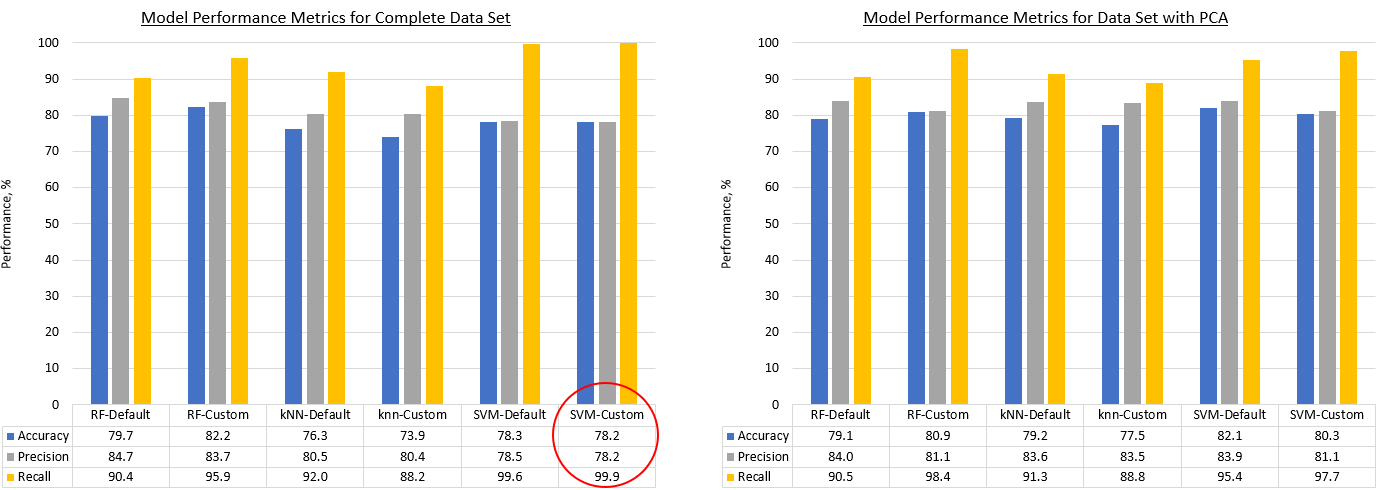